<a href="https://colab.research.google.com/github/tiagopessoalima/teaching/blob/main/02_projeto_de_aprendizado_de_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Aprendizado de M√°quina: Ponta a Ponta**

Nesta aula, ser√° realizada a an√°lise de um projeto de Aprendizado de M√°quina, seguindo o pipeline de um Cientista de Dados. As etapas s√£o:

1. Defini√ß√£o do problema;
2. Coleta de dados;
3. Pr√©-processamento dos dados;
4. Sele√ß√£o de features;
5. Treinamento do modelo;
6. Ajuste de hiperpar√¢metros;
7. Avalia√ß√£o dos resultados;
8. Deployment em produ√ß√£o.








## **1. Defini√ß√£o do Problema**

**Problema de Neg√≥cio:**

O mercado imobili√°rio √© caracterizado por sua din√¢mica e complexidade, com os pre√ßos dos im√≥veis sendo influenciados por uma multitude de fatores. A capacidade de estimar o valor de um im√≥vel de forma precisa √© fundamental para a tomada de decis√µes informadas por parte de compradores, vendedores, investidores e institui√ß√µes financeiras.

**Descri√ß√£o do Conjunto de Dados:**

O conjunto de dados utilizado neste projeto cont√©m informa√ß√µes sobre diferentes distritos da [Calif√≥rnia](https://pt.wikipedia.org/wiki/Calif%C3%B3rnia), com o objetivo de prever os valores medianos das casas nessas regi√µes. As features dispon√≠veis incluem:

* **Localiza√ß√£o geogr√°fica:** Informa√ß√µes sobre a localiza√ß√£o dos distritos.
* **Caracter√≠sticas demogr√°ficas:** N√∫mero de habitantes, renda m√©dia, etc.
* **Caracter√≠sticas dos im√≥veis:** N√∫mero de quartos, idade m√©dia das casas, etc.

Este conjunto √© muito utilizado em estudos de [regress√£o](https://pt.wikipedia.org/wiki/Regress%C3%A3o_(estat%C3%ADstica)) para modelar a rela√ß√£o entre essas vari√°veis e o pre√ßo mediano dos im√≥veis.

**Objetivos do Projeto:**

* **Modelagem Preditiva:** Desenvolver um modelo de aprendizado de m√°quina capaz de prever o pre√ßo de um im√≥vel na Calif√≥rnia.
* **Identifica√ß√£o de Fatores Influentes:** Identificar as caracter√≠sticas mais relevantes que exercem influ√™ncia sobre o pre√ßo dos im√≥veis.
* **Gera√ß√£o de Insights:** Fornecer insights que possam auxiliar compradores, vendedores e outros participantes do mercado imobili√°rio.

**[M√©tricas de Avalia√ß√£o:](https://www.youtube.com/watch?v=DvPXuIWPIN0)**

* **[Erro Quadr√°tico M√©dio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio) (RMSE):** M√©trica amplamente utilizada para avaliar o desempenho de modelos de regress√£o, quantificando a discrep√¢ncia entre os pre√ßos previstos pelo modelo e os pre√ßos reais dos im√≥veis.

* **[R¬≤](https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o) (Coeficiente de Determina√ß√£o):** M√©trica que expressa a propor√ß√£o da vari√¢ncia nos pre√ßos dos im√≥veis que √© explicada pelo modelo, indicando o qu√£o bem o modelo se ajusta aos dados.

Com o problema definido e as m√©tricas estabelecidas, o pr√≥ximo passo consiste na coleta e explora√ß√£o dos dados do reposit√≥rio StatLib, visando compreender suas caracter√≠sticas e preparar o terreno para as etapas subsequentes de pr√©-processamento e sele√ß√£o de features.

## **2. Coleta de Dados**


Neste projeto, o conjunto de dados foi obtido diretamente do reposit√≥rio GitHub de [Aur√©lien G√©ron](https://github.com/ageron), autor do livro [M√£os √† Obra: Aprendizado de M√°quina com Scikit-Learn, Keras & TensorFlow](https://github.com/ageron/handson-ml2). Alternativamente, o *dataset* tamb√©m est√° dispon√≠vel no [kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

### **Baixar os Dados**

In [1]:
import os
import tarfile
from urllib.request import urlretrieve # Corre√ß√£o: use urlretrieve diretamente

# Constantes para URLs e caminhos
URL_RAIZ_DOWNLOAD = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
CAMINHO_DADOS_IMOVEIS = os.path.join("datasets", "housing")
URL_DADOS_IMOVEIS = URL_RAIZ_DOWNLOAD + "datasets/housing/housing.tgz"

# Cria o diret√≥rio se n√£o existir, sem gerar erro se j√° existir
os.makedirs(CAMINHO_DADOS_IMOVEIS, exist_ok=True)
caminho_arquivo_tgz = os.path.join(CAMINHO_DADOS_IMOVEIS, "housing.tgz")

# Verifica se o arquivo j√° existe antes de baixar
if not os.path.exists(caminho_arquivo_tgz):
    print(f"Baixando dados de {URL_DADOS_IMOVEIS} para {caminho_arquivo_tgz}")
    urlretrieve(URL_DADOS_IMOVEIS, caminho_arquivo_tgz) # Corre√ß√£o: use urlretrieve
else:
    print(f"Arquivo {caminho_arquivo_tgz} j√° existe. Pulando download.")

# Extrai o arquivo apenas se o arquivo CSV de dados n√£o existir
caminho_arquivo_csv = os.path.join(CAMINHO_DADOS_IMOVEIS, "housing.csv")
if not os.path.exists(caminho_arquivo_csv):
    with tarfile.open(caminho_arquivo_tgz) as arquivo_tgz_imoveis:
        print("Extraindo dados...")
        arquivo_tgz_imoveis.extractall(path=CAMINHO_DADOS_IMOVEIS)
else:
    print(f"Dados j√° extra√≠dos em {caminho_arquivo_csv}. Pulando extra√ß√£o.")

Baixando dados de https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz para datasets/housing/housing.tgz
Extraindo dados...


### **Carregar os Dados**

In [2]:
import pandas as pd

# Definir a vari√°vel `csv_path` usando `os.path.join` para juntar o `CAMINHO_DADOS_IMOVEIS` com o nome do arquivo CSV "housing.csv"
csv_path = os.path.join(CAMINHO_DADOS_IMOVEIS, "housing.csv")

# Usar `pd.read_csv` para ler o arquivo CSV localizado em `csv_path` e armazenar o resultado em um DataFrame chamado `housing`
housing = pd.read_csv(csv_path)

### **Analisar os Dados**








Vamos come√ßar olhando para as 5 primeiras linhas do *DataFrame* `housing` usando o m√©todo `head()`

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Prosseguiremos com a tradu√ß√£o das colunas do *DataFrame* `housing` para o portugu√™s, para facilitar a compreens√£o e an√°lise dos dados.

In [4]:
housing = housing.rename(columns={
    'longitude': 'longitude',
    'latitude': 'latitude',
    'housing_median_age': 'idade_m√©dia_moradias',
    'total_rooms': 'total_c√¥modos',
    'total_bedrooms': 'total_quartos',
    'population': 'popula√ß√£o',
    'households': 'domic√≠lios',
    'median_income': 'renda_mediana',
    'median_house_value': 'valor_mediano_casas',
    'ocean_proximity': 'proximidade_ao_oceano'
})

E agora com a tradu√ß√£o dos valores da coluna `proximidade_ao_oceano`.

In [5]:
housing['proximidade_ao_oceano'] = housing['proximidade_ao_oceano'].replace({
    'NEAR BAY': 'PERTO DA BA√çA',
    '<1H OCEAN': 'MENOS DE 1H DO OCEANO',
    'INLAND': 'INTERIOR',
    'NEAR OCEAN': 'PERTO DO OCEANO',
    'ISLAND': 'ILHA'
})

Para apresentar o *DataFrame* `housing` traduzido para o portugu√™s, vamos exibir novamente as 5 primeiras linhas usando o m√©todo `head()`

In [6]:
housing.head()

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  total_quartos  \
0    -122.23     37.88                  41.0          880.0          129.0   
1    -122.22     37.86                  21.0         7099.0         1106.0   
2    -122.24     37.85                  52.0         1467.0          190.0   
3    -122.25     37.85                  52.0         1274.0          235.0   
4    -122.25     37.85                  52.0         1627.0          280.0   

   popula√ß√£o  domic√≠lios  renda_mediana  valor_mediano_casas  \
0      322.0       126.0         8.3252             452600.0   
1     2401.0      1138.0         8.3014             358500.0   
2      496.0       177.0         7.2574             352100.0   
3      558.0       219.0         5.6431             341300.0   
4      565.0       259.0         3.8462             342200.0   

  proximidade_ao_oceano  
0         PERTO DA BA√çA  
1         PERTO DA BA√çA  
2         PERTO DA BA√çA  
3         PERTO DA BA√çA  
4         PERTO DA BA√çA

Em seguida, ser√° feita a an√°lise do n√∫mero de linhas, colunas, tipos de dados e a quantidade de valores nulos, utilizando o m√©todo `info()`.

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              20640 non-null  float64
 1   latitude               20640 non-null  float64
 2   idade_m√©dia_moradias   20640 non-null  float64
 3   total_c√¥modos          20640 non-null  float64
 4   total_quartos          20433 non-null  float64
 5   popula√ß√£o              20640 non-null  float64
 6   domic√≠lios             20640 non-null  float64
 7   renda_mediana          20640 non-null  float64
 8   valor_mediano_casas    20640 non-null  float64
 9   proximidade_ao_oceano  20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observa√ß√µes Gerais:**

- O *dataset* cont√©m informa√ß√µes sobre 20.640 im√≥veis na Calif√≥rnia;
- A coluna `total_quartos` possui cerca de 200 valores ausentes;
- A coluna `proximidade_ao_oceano` n√£o √© num√©rica.

In [8]:
housing["proximidade_ao_oceano"].value_counts()

proximidade_ao_oceano
MENOS DE 1H DO OCEANO    9136
INTERIOR                 6551
PERTO DO OCEANO          2658
PERTO DA BA√çA            2290
ILHA                        5
Name: count, dtype: int64

Agora, utilizaremos o m√©todo `describe()` para obter um resumo estat√≠stico das colunas num√©ricas do conjunto de dados, incluindo informa√ß√µes como a m√©dia, desvio padr√£o, valores m√≠nimo e m√°ximo, al√©m dos percentis.



In [9]:
housing.describe()

longitude      latitude  idade_m√©dia_moradias  total_c√¥modos  \
count  20640.000000  20640.000000          20640.000000   20640.000000   
mean    -119.569704     35.631861             28.639486    2635.763081   
std        2.003532      2.135952             12.585558    2181.615252   
min     -124.350000     32.540000              1.000000       2.000000   
25%     -121.800000     33.930000             18.000000    1447.750000   
50%     -118.490000     34.260000             29.000000    2127.000000   
75%     -118.010000     37.710000             37.000000    3148.000000   
max     -114.310000     41.950000             52.000000   39320.000000   

       total_quartos     popula√ß√£o    domic√≠lios  renda_mediana  \
count   20433.000000  20640.000000  20640.000000   20640.000000   
mean      537.870553   1425.476744    499.539680       3.870671   
std       421.385070   1132.462122    382.329753       1.899822   
min         1.000000      3.000000      1.000000       0.499900   
25%       296.000000    787.000000    280.000000       2.563400   
50%       435.000000   1166.000000    409.000000       3.534800   
75%       647.000000   1725.000000    605.000000       4.743250   
max      6445.000000  35682.000000   6082.000000      15.000100   

       valor_mediano_casas  
count         20640.000000  
mean         206855.816909  
std          115395.615874  
min           14999.000000  
25%          119600.000000  
50%          179700.000000  
75%          264725.000000  
max          500001.000000

**Observa√ß√µes Gerais:**

- A distribui√ß√£o geogr√°fica dos im√≥veis, representada por longitude e latitude, abrange uma √°rea consider√°vel da Calif√≥rnia.
- A `idade_m√©dia_moradias` varia de 1 a 52 anos, com uma m√©dia de 28.6 anos, sugerindo uma mistura de im√≥veis novos e antigos.
- O n√∫mero de c√¥modos (`total_c√¥modos`) e quartos (`total_quartos`) apresentam alta variabilidade, com valores m√°ximos muito distantes das m√©dias, indicando a presen√ßa de im√≥veis de grande porte.
- As colunas `popula√ß√£o` e `domic√≠lios` tamb√©m exibem grande varia√ß√£o, refletindo a diversidade de densidade populacional.
- O `valor_mediano_casas` tamb√©m apresenta alta variabilidade, com valores m√°ximos muito acima da m√©dia.

### **Visualisar os Dados**

Atrav√©s de gr√°ficos e mapas, podemos obter *insights* valiosos sobre as rela√ß√µes entre as vari√°veis e a distribui√ß√£o dos dados, o que nos auxiliar√° nas etapas subsequentes de pr√©-processamento e modelagem.

#### **Histogramas**

 S√£o gr√°ficos que mostram a distribui√ß√£o de frequ√™ncia de um conjunto de dados num√©ricos. Cada barra representa um intervalo de valores, e sua altura indica quantos dados caem dentro daquele intervalo. Isso permite visualizar rapidamente a forma da distribui√ß√£o, identificando onde os dados se concentram, se h√° valores extremos (outliers) e se a distribui√ß√£o √© sim√©trica ou assim√©trica.

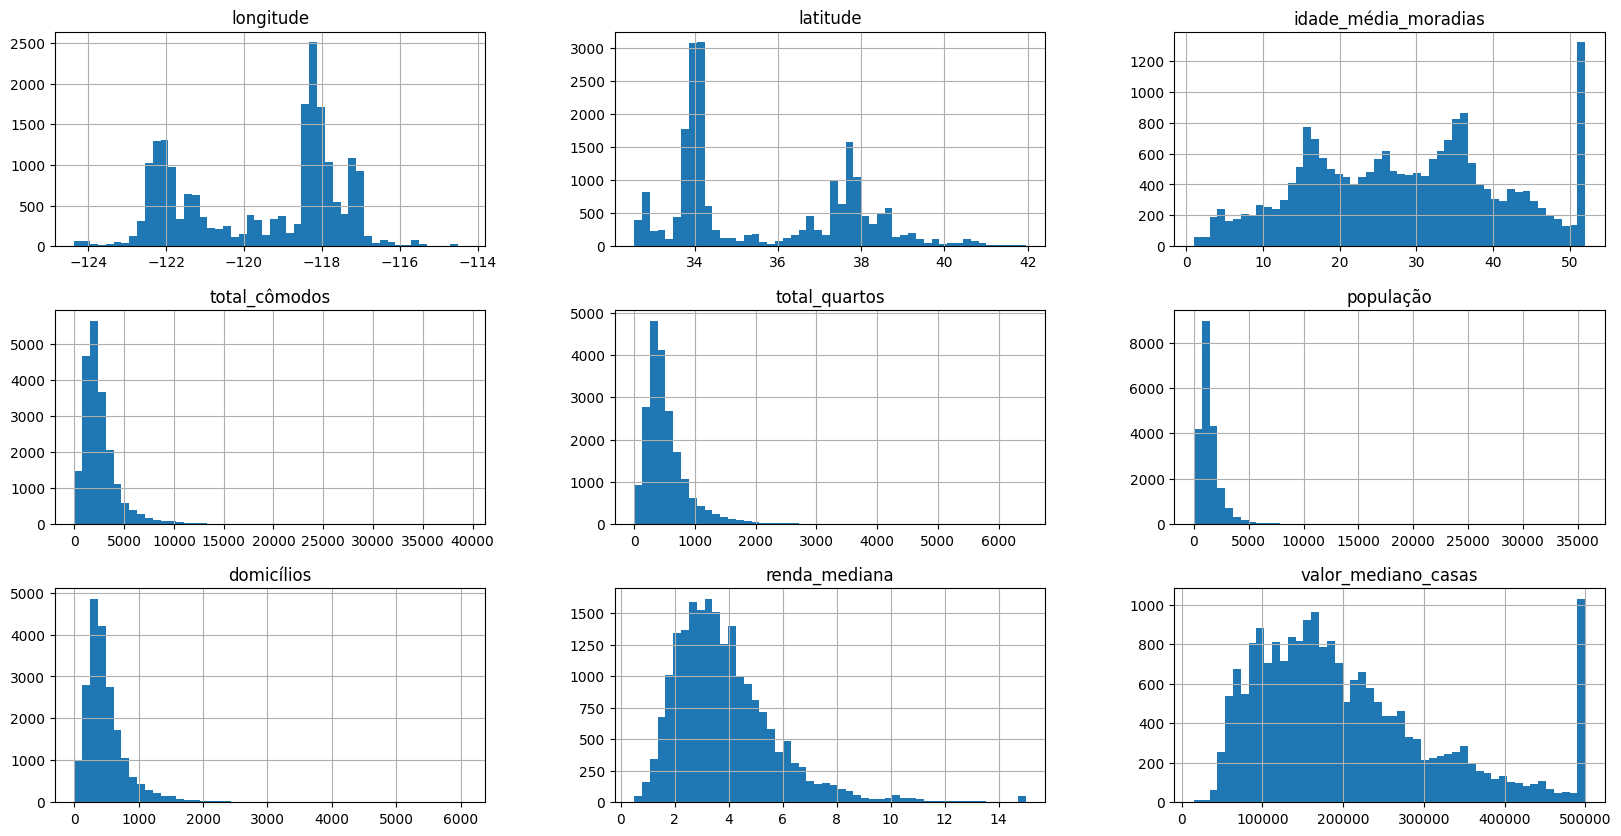

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,10))
plt.show()

**Observa√ß√µes Gerais**

* **`longitude` e `latitude`:** Os histogramas mostram que os dados est√£o concentrados em determinadas faixas de longitude e latitude, o que √© esperado, j√° que os im√≥veis est√£o localizados na Calif√≥rnia. A distribui√ß√£o da longitude √© mais concentrada, enquanto a latitude apresenta uma distribui√ß√£o mais espalhada.
* **`idade_mediana_das_casas`:** A maioria dos im√≥veis parece ter uma idade mediana entre 10 e 30 anos, com uma cauda longa √† direita, indicando a presen√ßa de alguns im√≥veis mais antigos.
* **`total_de_comodos` e `total_de_quartos`:** Ambas as vari√°veis apresentam distribui√ß√µes assim√©tricas √† direita, com a maioria dos im√≥veis tendo um n√∫mero relativamente baixo de c√¥modos e quartos. Existem alguns outliers com valores muito altos, o que pode indicar a presen√ßa de mans√µes ou pr√©dios de apartamentos.
* **`popula√ß√£o` e `domic√≠lios`:** Assim como as vari√°veis anteriores, essas tamb√©m apresentam distribui√ß√µes assim√©tricas √† direita. A maioria dos distritos tem uma popula√ß√£o e n√∫mero de domic√≠lios relativamente baixos, com alguns outliers com valores muito altos, possivelmente representando √°reas urbanas densamente povoadas.
* **`renda_mediana`:** A distribui√ß√£o da renda mediana tamb√©m √© assim√©trica √† direita, com a maioria dos distritos tendo uma renda mediana entre 2 e 5 (em dezenas de milhares de d√≥lares). Isso sugere que a maioria dos im√≥veis est√° localizada em √°reas de renda m√©dia a baixa, com alguns em √°reas de alta renda.
* **`valor_mediano_da_casa`:** A vari√°vel alvo tamb√©m apresenta uma distribui√ß√£o assim√©trica √† direita, com a maioria dos im√≥veis tendo um valor mediano abaixo de 250.000 d√≥lares.


#### **Mapas**

S√£o representa√ß√µes visuais que mostram a distribui√ß√£o geogr√°fica de um conjunto de dados. Cada √°rea no mapa √© colorida ou sinalizada de acordo com a intensidade ou frequ√™ncia de um dado espec√≠fico, permitindo a visualiza√ß√£o das varia√ß√µes espaciais. Isso ajuda a identificar padr√µes geogr√°ficos, como √°reas com maior concentra√ß√£o de dados, a presen√ßa de clusters ou aglomerados, e varia√ß√µes regionais.



##### **Distribui√ß√£o Espacial de Dados de Habita√ß√£o**

O gr√°fico abaixo oferece uma visualiza√ß√£o da distribui√ß√£o espacial dos dados. √â poss√≠vel observar se os pontos est√£o agrupados em certas regi√µes, se existem √°reas com maior densidade de pontos ou se h√° pontos isolados (*outliers*). Essa visualiza√ß√£o inicial pode ajudar a identificar padr√µes geogr√°ficos relevantes nos dados e orientar an√°lises posteriores.

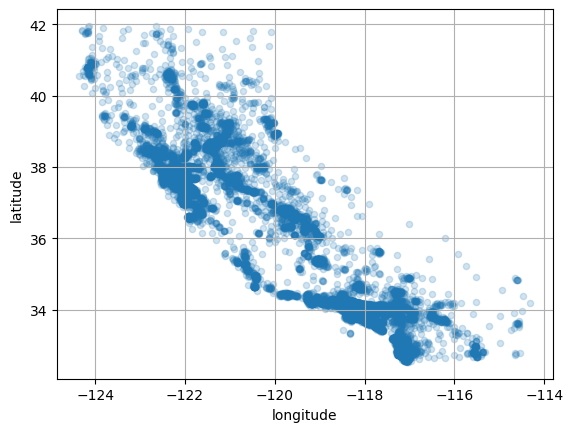

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

##### **Distribui√ß√£o Espacial de Habita√ß√£o com Popula√ß√£o e Valor Mediano das Casas**



O pr√≥ximo gr√°fico de dispers√£o possui melhorias importantes em rela√ß√£o ao anterior:

Melhoria | Descri√ß√£o |
--- | --- |
Tamanho dos pontos | Proporcional √† popula√ß√£o da √°rea, permitindo identificar visualmente as regi√µes mais populosas de forma r√°pida.
Cores | Cada ponto √© colorido de acordo com o valor mediano das casas, com cores mais quentes indicando valores mais elevados.


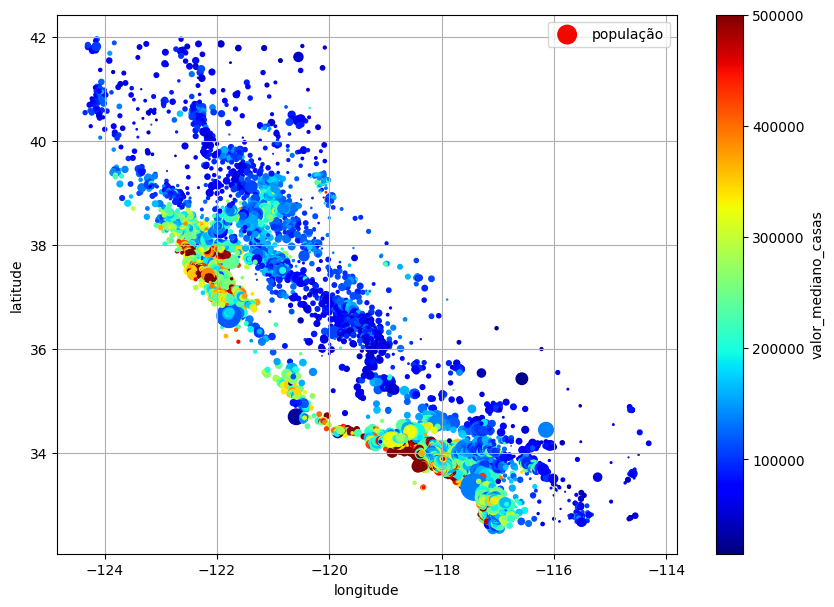

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["popula√ß√£o"] / 100, label="popula√ß√£o",
             c="valor_mediano_casas", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

O c√≥digo a seguir cria um gr√°fico que sobrep√µe o gr√°fico anterior sobre um mapa da Calif√≥rnia, permitindo uma an√°lise intuitiva da rela√ß√£o entre localiza√ß√£o, popula√ß√£o e valor mediano das casas.

In [13]:
import urllib

# Caminho para salvar as imagens
caminho_imagens = os.path.join("images")
os.makedirs(caminho_imagens, exist_ok=True)  # Cria a pasta se ela n√£o existir

# URL base para download
URL_RAIZ_DOWNLOAD = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
nome_arquivo = "california.png"
print("Baixando o mapa", nome_arquivo)
url = URL_RAIZ_DOWNLOAD + "images/end_to_end_project/" + nome_arquivo

# Baixar e salvar a imagem
urllib.request.urlretrieve(url, os.path.join(caminho_imagens, nome_arquivo))

Baixando o mapa california.png


('images/california.png', <http.client.HTTPMessage at 0x7b6d22a0fac0>)

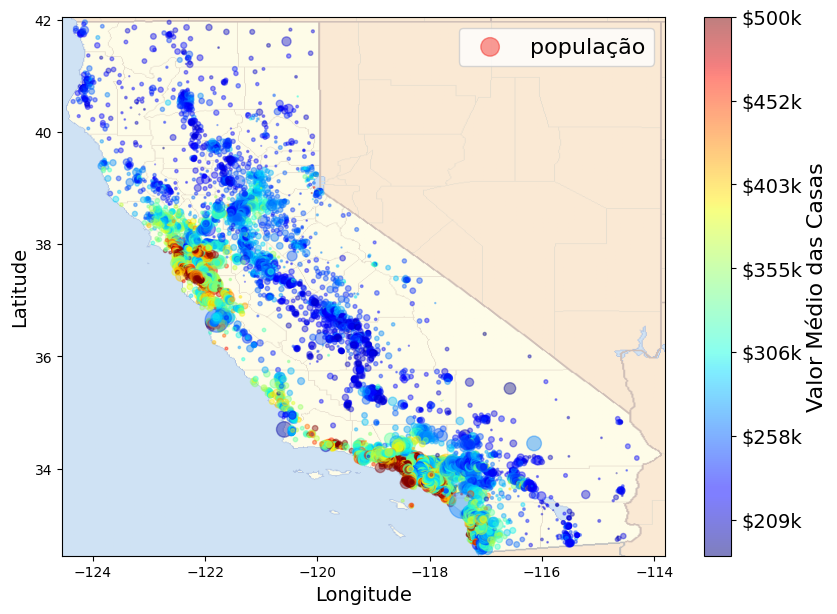

In [14]:
import matplotlib.image as mpimg
import numpy as np

# Carregar a imagem da Calif√≥rnia
imagem_california = mpimg.imread(os.path.join(caminho_imagens, nome_arquivo))

# Criar o gr√°fico de dispers√£o
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['popula√ß√£o']/100, label="popula√ß√£o",
                  c="valor_mediano_casas", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

# Sobrepor a imagem da Calif√≥rnia no gr√°fico
plt.imshow(imagem_california, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# Adicionar r√≥tulos aos eixos
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Configurar a barra de cores
precos = housing["valor_mediano_casas"]
valores_ticks = np.linspace(precos.min(), precos.max(), 11)
barra_cores = plt.colorbar(ticks=valores_ticks/precos.max())
barra_cores.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in valores_ticks], fontsize=14)
barra_cores.set_label('Valor M√©dio das Casas', fontsize=16)

# Adicionar legenda
plt.legend(fontsize=16)

# Exibir o gr√°fico
plt.show()

## **3. Pr√©-processamento dos Dados**

Ap√≥s a explora√ß√£o e visualiza√ß√£o dos dados, que nos forneceram uma compreens√£o das suas caracter√≠sticas e desafios potenciais, √© essencial avan√ßar para o pr√©-processamento. Esta fase √© cr√≠tica para a prepara√ß√£o dos dados para modelagem, assegurando que estejam em um formato apropriado para os algoritmos de aprendizado de m√°quina. O pr√©-processamento envolve a transforma√ß√£o dos dados brutos em um estado que maximize a efic√°cia dos modelos, abordando quest√µes como qualidade dos dados, escalabilidade e relev√¢ncia das features.










### **Tratamento de Valores Ausentes:**



√â fundamental abordar valores ausentes de maneira adequada para manter a integridade dos dados. As estrat√©gias incluem a exclus√£o de linhas ou colunas com uma quantidade significativa de valores ausentes, ou a imputa√ß√£o desses valores utilizando m√©todos estat√≠sticos.

#### **Exclus√£o de Linhas ou Colunas**


Eliminar todas as linhas que cont√™m pelo menos um valor nulo √© uma estrat√©gia direta de limpeza de dados. No entanto, essa abordagem pode resultar em perda significativa de informa√ß√µes, especialmente em casos onde a quantidade de registros incompletos √© elevada, impactando a representatividade e a qualidade da an√°lise subsequente.

In [15]:
# Excluir linhas que cont√™m valores ausentes
df_cleaned = housing.dropna()

# Exibir o DataFrame limpo
df_cleaned

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  \
0        -122.23     37.88                  41.0          880.0   
1        -122.22     37.86                  21.0         7099.0   
2        -122.24     37.85                  52.0         1467.0   
3        -122.25     37.85                  52.0         1274.0   
4        -122.25     37.85                  52.0         1627.0   
...          ...       ...                   ...            ...   
20635    -121.09     39.48                  25.0         1665.0   
20636    -121.21     39.49                  18.0          697.0   
20637    -121.22     39.43                  17.0         2254.0   
20638    -121.32     39.43                  18.0         1860.0   
20639    -121.24     39.37                  16.0         2785.0   

       total_quartos  popula√ß√£o  domic√≠lios  renda_mediana  \
0              129.0      322.0       126.0         8.3252   
1             1106.0     2401.0      1138.0         8.3014   
2              190.0      496.0       177.0         7.2574   
3              235.0      558.0       219.0         5.6431   
4              280.0      565.0       259.0         3.8462   
...              ...        ...         ...            ...   
20635          374.0      845.0       330.0         1.5603   
20636          150.0      356.0       114.0         2.5568   
20637          485.0     1007.0       433.0         1.7000   
20638          409.0      741.0       349.0         1.8672   
20639          616.0     1387.0       530.0         2.3886   

       valor_mediano_casas proximidade_ao_oceano  
0                 452600.0         PERTO DA BA√çA  
1                 358500.0         PERTO DA BA√çA  
2                 352100.0         PERTO DA BA√çA  
3                 341300.0         PERTO DA BA√çA  
4                 342200.0         PERTO DA BA√çA  
...                    ...                   ...  
20635              78100.0              INTERIOR  
20636              77100.0              INTERIOR  
20637              92300.0              INTERIOR  
20638              84700.0              INTERIOR  
20639              89400.0              INTERIOR  

[20433 rows x 10 columns]

Excluir as colunas com alta porcentagem de valores nulos, geralmente acima de um limiar previamente definido, √© uma abordagem mais seletiva de tratamento de dados incompletos. Embora essa estrat√©gia mantenha uma maior quantidade de registros, existe o risco de remover vari√°veis potencialmente relevantes para a an√°lise, comprometendo a integridade dos modelos preditivos ou das infer√™ncias subsequentes.

In [16]:
# Definir o limite de valores ausentes
threshold = 0.8  # Excluir colunas com mais de 80% de valores ausentes

# Calcular o n√∫mero m√≠nimo de valores n√£o ausentes necess√°rios
min_non_na = len(housing) * (1 - threshold)

# Excluir colunas com valores ausentes acima do limite especificado
df_cleaned = housing.dropna(axis=1, thresh=min_non_na)

# Exibir o DataFrame limpo
df_cleaned.head()

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  total_quartos  \
0    -122.23     37.88                  41.0          880.0          129.0   
1    -122.22     37.86                  21.0         7099.0         1106.0   
2    -122.24     37.85                  52.0         1467.0          190.0   
3    -122.25     37.85                  52.0         1274.0          235.0   
4    -122.25     37.85                  52.0         1627.0          280.0   

   popula√ß√£o  domic√≠lios  renda_mediana  valor_mediano_casas  \
0      322.0       126.0         8.3252             452600.0   
1     2401.0      1138.0         8.3014             358500.0   
2      496.0       177.0         7.2574             352100.0   
3      558.0       219.0         5.6431             341300.0   
4      565.0       259.0         3.8462             342200.0   

  proximidade_ao_oceano  
0         PERTO DA BA√çA  
1         PERTO DA BA√çA  
2         PERTO DA BA√çA  
3         PERTO DA BA√çA  
4         PERTO DA BA√çA

#### **Imputa√ß√£o de Valores Ausentes**

- **M√©dia:** Para colunas num√©ricas, voc√™ pode substituir valores ausentes pela m√©dia dos valores n√£o ausentes.

- **Mediana:** Em dados com distribui√ß√£o assim√©trica, a mediana pode ser uma escolha mais robusta do que a m√©dia.

- **Moda:** Para vari√°veis categ√≥ricas, pode-se substituir valores ausentes pela moda (o valor mais frequente).

- **M√©todos Avan√ßados:** T√©cnicas como KNN ou regress√£o podem prever valores ausentes com base em outras vari√°veis.







In [17]:
from sklearn.impute import KNNImputer

# Imputa valores ausentes com a m√©dia
housing_imputed_mean = housing.copy()
housing_imputed_mean['total_quartos'].fillna(housing['total_quartos'].mean(), inplace=True)

# Imputa valores ausentes com a mediana
housing_imputed_median = housing.copy()
housing_imputed_median['total_quartos'].fillna(housing['total_quartos'].median(), inplace=True)

# Imputa valores ausentes com KNN
imputer = KNNImputer(n_neighbors=3)
housing_imputed_knn = pd.DataFrame(imputer.fit_transform(housing.iloc[:,:-1]), columns=housing.columns[:-1])

# Imprime as 5 primeiras linhas de cada DataFrame imputado
print("\nImputado com a M√©dia:")
print(housing_imputed_mean.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nImputado com a Mediana:")
print(housing_imputed_median.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nImputado com KNN:")
print(housing_imputed_knn.head().to_markdown(index=False, numalign="left", stralign="left"))


Imputado com a M√©dia:
| longitude   | latitude   | idade_m√©dia_moradias   | total_c√¥modos   | total_quartos   | popula√ß√£o   | domic√≠lios   | renda_mediana   | valor_mediano_casas   | proximidade_ao_oceano   |
|:------------|:-----------|:-----------------------|:----------------|:----------------|:------------|:-------------|:----------------|:----------------------|:------------------------|
| -122.23     | 37.88      | 41                     | 880             | 129             | 322         | 126          | 8.3252          | 452600                | PERTO DA BA√çA           |
| -122.22     | 37.86      | 21                     | 7099            | 1106            | 2401        | 1138         | 8.3014          | 358500                | PERTO DA BA√çA           |
| -122.24     | 37.85      | 52                     | 1467            | 190             | 496         | 177          | 7.2574          | 352100                | PERTO DA BA√çA           |
| -122.25     | 37.85      | 52  

**ATEN√á√ÉO:** Durante a imputa√ß√£o, √© essencial evitar o vazamento de dados entre os conjuntos de treino e teste. O vazamento de dados ocorre quando informa√ß√µes do conjunto de teste s√£o utilizadas para ajustar o modelo durante o treinamento, comprometendo a avalia√ß√£o imparcial do desempenho do modelo. Imputar valores ausentes em todo o conjunto de dados antes da separa√ß√£o em treino e teste pode levar a um vazamento, pois os m√©todos de imputa√ß√£o podem utilizar informa√ß√µes dos dados de teste para ajustar as estimativas.

### **Identifica√ß√£o e Tratamento de Outliers:**


Outliers s√£o observa√ß√µes que se desviam significativamente dos padr√µes gerais do conjunto de dados e podem comprometer a integridade do modelo. Identificar e tratar outliers √© fundamental para garantir a robustez dos modelos preditivos. A identifica√ß√£o de outliers pode ser realizada atrav√©s de m√©todos estat√≠sticos e t√©cnicas de visualiza√ß√£o. O tratamento pode envolver a remo√ß√£o dos outliers, a aplica√ß√£o de transforma√ß√µes ou a utiliza√ß√£o de algoritmos robustos que n√£o sejam influenciados por esses valores extremos.

#### **Identifica√ß√£o por M√©todos Estat√≠sticos**

**Desvios Padr√£o:** *Outliers* podem ser identificados como valores que est√£o a mais de 2 ou 3 desvios padr√£o da m√©dia em distribui√ß√µes normais.

In [18]:
# Definir a feature para an√°lise
feature1 = 'total_c√¥modos'

# Calcular a m√©dia e o desvio padr√£o da feature
mean = housing[feature1].mean()
std_dev = housing[feature1].std()

# Definir o limiar para a detec√ß√£o de outliers
threshold = 3

# Identificar outliers como valores que est√£o a mais de 'threshold' desvios padr√£o da m√©dia
outliers = housing[(housing[feature1] > mean + threshold * std_dev) |
                   (housing[feature1] < mean - threshold * std_dev)]

# Exibir os outliers identificados
outliers

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  \
283      -122.16     37.79                  22.0        12842.0   
570      -122.24     37.72                   5.0        18634.0   
576      -122.06     37.77                  12.0        14316.0   
780      -122.10     37.63                  18.0         9963.0   
864      -122.01     37.57                  14.0        16199.0   
...          ...       ...                   ...            ...   
20451    -118.90     34.26                   5.0        25187.0   
20529    -121.78     38.55                  12.0        10509.0   
20530    -121.76     38.57                  11.0        15018.0   
20563    -121.75     38.67                   9.0        12139.0   
20629    -121.39     39.12                  28.0        10035.0   

       total_quartos  popula√ß√£o  domic√≠lios  renda_mediana  \
283           2048.0     4985.0      1967.0         5.9849   
570           2885.0     7427.0      2718.0         7.6110   
576           2045.0     5781.0      2007.0         7.2634   
780           2031.0     5613.0      1946.0         3.8171   
864           2993.0     8117.0      2847.0         5.8322   
...              ...        ...         ...            ...   
20451         3521.0    11956.0      3478.0         6.9712   
20529         2186.0     5633.0      2138.0         2.9605   
20530         3008.0     7984.0      2962.0         3.1371   
20563         2640.0     6837.0      2358.0         3.1250   
20629         1856.0     6912.0      1818.0         2.0943   

       valor_mediano_casas  proximidade_ao_oceano  
283               371000.0          PERTO DA BA√çA  
570               350700.0          PERTO DA BA√çA  
576               341600.0          PERTO DA BA√çA  
780               187200.0          PERTO DA BA√çA  
864               281800.0          PERTO DA BA√çA  
...                    ...                    ...  
20451             321300.0  MENOS DE 1H DO OCEANO  
20529             204300.0               INTERIOR  
20530             201800.0               INTERIOR  
20563             132500.0               INTERIOR  
20629             108300.0               INTERIOR  

[373 rows x 10 columns]

**Intervalos Interquartis (IQR):** *Outliers* tamb√©m podem ser identificados como valores que est√£o fora do intervalo de 1.5 vezes o IQR abaixo do primeiro quartil ou acima do terceiro quartil.

In [19]:
# Definir a feature para an√°lise
feature2 = 'total_quartos'

# Calcular os quartis e o intervalo interquartil (IQR) da feature
Q1 = housing[feature2].quantile(0.25)
Q3 = housing[feature2].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para a detec√ß√£o de outliers com base no IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers como valores fora dos limites definidos
outliers = housing[(housing[feature2] < lower_bound) | (housing[feature2] > upper_bound)]

# Exibir os outliers identificados
outliers

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  \
95       -122.26     37.80                  36.0         5329.0   
96       -122.26     37.82                  31.0         4596.0   
98       -122.26     37.82                  22.0         3682.0   
100      -122.25     37.81                  29.0         4656.0   
101      -122.25     37.81                  28.0         5806.0   
...          ...       ...                   ...            ...   
20539    -121.71     38.56                  20.0         8627.0   
20543    -121.74     38.55                  33.0         6861.0   
20544    -121.76     38.55                  23.0         8800.0   
20563    -121.75     38.67                   9.0        12139.0   
20629    -121.39     39.12                  28.0        10035.0   

       total_quartos  popula√ß√£o  domic√≠lios  renda_mediana  \
95            2477.0     3469.0      2323.0         2.0096   
96            1331.0     2048.0      1180.0         2.8345   
98            1270.0     2024.0      1250.0         1.2185   
100           1414.0     2304.0      1250.0         2.4912   
101           1603.0     2563.0      1497.0         3.2177   
...              ...        ...         ...            ...   
20539         1516.0     4071.0      1466.0         4.2198   
20543         1820.0     3717.0      1767.0         1.7311   
20544         1857.0     6330.0      1832.0         2.0650   
20563         2640.0     6837.0      2358.0         3.1250   
20629         1856.0     6912.0      1818.0         2.0943   

       valor_mediano_casas proximidade_ao_oceano  
95                130000.0         PERTO DA BA√çA  
96                183800.0         PERTO DA BA√çA  
98                170000.0         PERTO DA BA√çA  
100               257800.0         PERTO DA BA√çA  
101               273400.0         PERTO DA BA√çA  
...                    ...                   ...  
20539             164100.0              INTERIOR  
20543             182600.0              INTERIOR  
20544             219400.0              INTERIOR  
20563             132500.0              INTERIOR  
20629             108300.0              INTERIOR  

[1271 rows x 10 columns]

#### **T√©cnicas de Visualiza√ß√£o**



**Box Plot:** Um *box plot* pode revelar *outliers* como pontos que est√£o fora dos "bigodes" do gr√°fico.

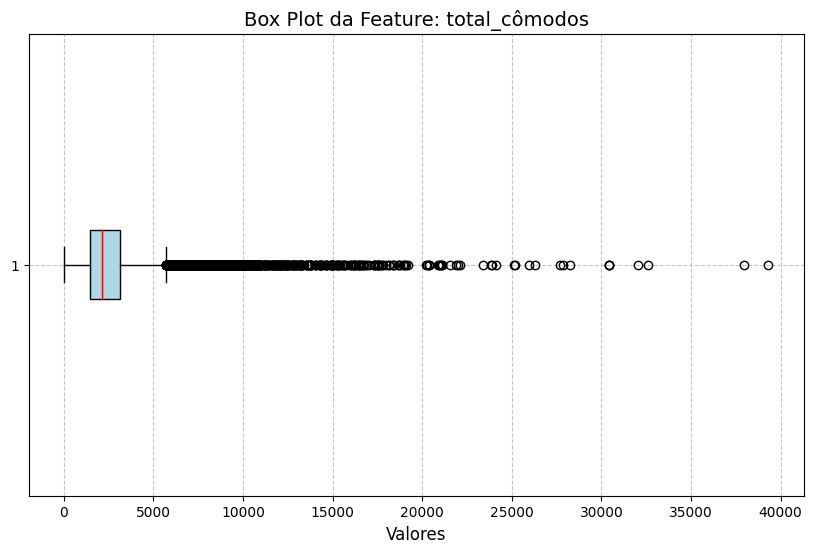

In [20]:
# Criar o box plot para a feature selecionada
plt.figure(figsize=(10, 6))
plt.boxplot(housing[feature1], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot da Feature: {feature1}', fontsize=14)
plt.xlabel('Valores', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Scatter Plot:** *Outliers* tamb√©m podem ser visualizados como pontos isolados em um *scatter plot*.


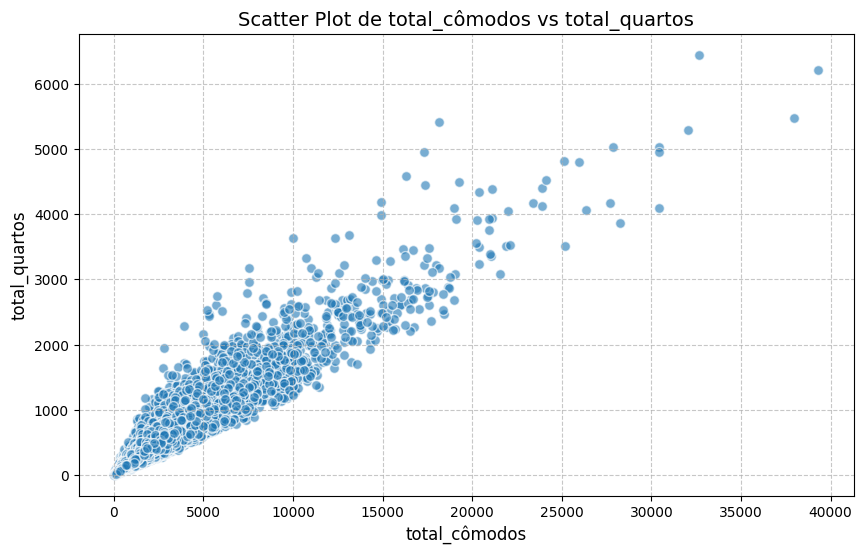

In [21]:
# Criar o scatter plot para as duas features
plt.figure(figsize=(10, 6))
plt.scatter(housing[feature1], housing[feature2], alpha=0.6, edgecolors='w', s=50)
plt.title(f'Scatter Plot de {feature1} vs {feature2}', fontsize=14)
plt.xlabel(feature1, fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### **Tratamento de Outliers**

##### **Remo√ß√£o**

Valores identificados como *outliers* podem ser removidos do conjunto de dados.

In [22]:
# Filtra o DataFrame para excluir as linhas cujos √≠ndices est√£o presentes no DataFrame de outliers
df_cleaned = housing.loc[~housing.index.isin(outliers.index)].copy()

# Exibir o DataFrame limpo
df_cleaned

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  \
0        -122.23     37.88                  41.0          880.0   
1        -122.22     37.86                  21.0         7099.0   
2        -122.24     37.85                  52.0         1467.0   
3        -122.25     37.85                  52.0         1274.0   
4        -122.25     37.85                  52.0         1627.0   
...          ...       ...                   ...            ...   
20635    -121.09     39.48                  25.0         1665.0   
20636    -121.21     39.49                  18.0          697.0   
20637    -121.22     39.43                  17.0         2254.0   
20638    -121.32     39.43                  18.0         1860.0   
20639    -121.24     39.37                  16.0         2785.0   

       total_quartos  popula√ß√£o  domic√≠lios  renda_mediana  \
0              129.0      322.0       126.0         8.3252   
1             1106.0     2401.0      1138.0         8.3014   
2              190.0      496.0       177.0         7.2574   
3              235.0      558.0       219.0         5.6431   
4              280.0      565.0       259.0         3.8462   
...              ...        ...         ...            ...   
20635          374.0      845.0       330.0         1.5603   
20636          150.0      356.0       114.0         2.5568   
20637          485.0     1007.0       433.0         1.7000   
20638          409.0      741.0       349.0         1.8672   
20639          616.0     1387.0       530.0         2.3886   

       valor_mediano_casas proximidade_ao_oceano  
0                 452600.0         PERTO DA BA√çA  
1                 358500.0         PERTO DA BA√çA  
2                 352100.0         PERTO DA BA√çA  
3                 341300.0         PERTO DA BA√çA  
4                 342200.0         PERTO DA BA√çA  
...                    ...                   ...  
20635              78100.0              INTERIOR  
20636              77100.0              INTERIOR  
20637              92300.0              INTERIOR  
20638              84700.0              INTERIOR  
20639              89400.0              INTERIOR  

[19369 rows x 10 columns]

#### **Transforma√ß√µes**

**Transforma√ß√µes Logar√≠tmicas:** Aplicar uma transforma√ß√£o logar√≠tmica pode reduzir a influ√™ncia de outliers.




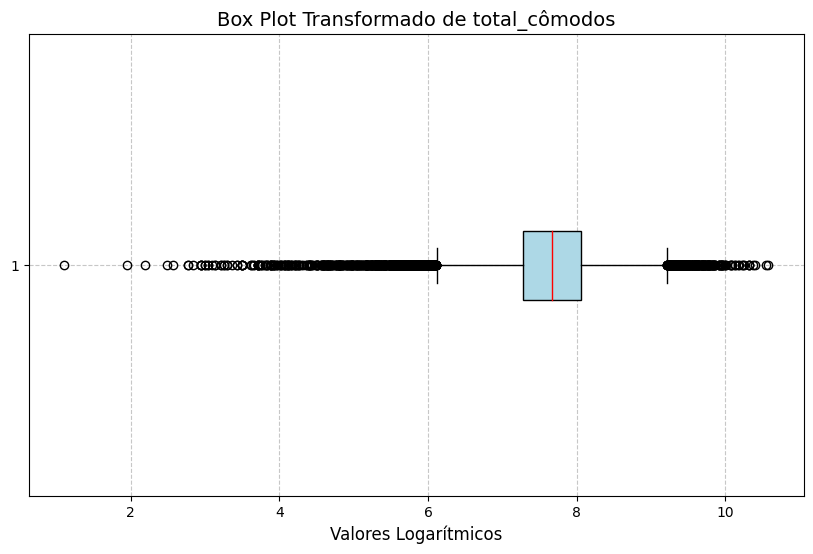

In [23]:
# Aplicar transforma√ß√£o logar√≠tmica para estabilizar a vari√¢ncia e reduzir o impacto de outliers
transformed_data = np.log1p(housing[feature1])

# Criar o box plot para os dados transformados
plt.figure(figsize=(10, 6))
plt.boxplot(transformed_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot Transformado de {feature1}', fontsize=14)
plt.xlabel('Valores Logar√≠tmicos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Winsorizing:** Substituir outliers por valores pr√≥ximos aos limites do intervalo IQR.

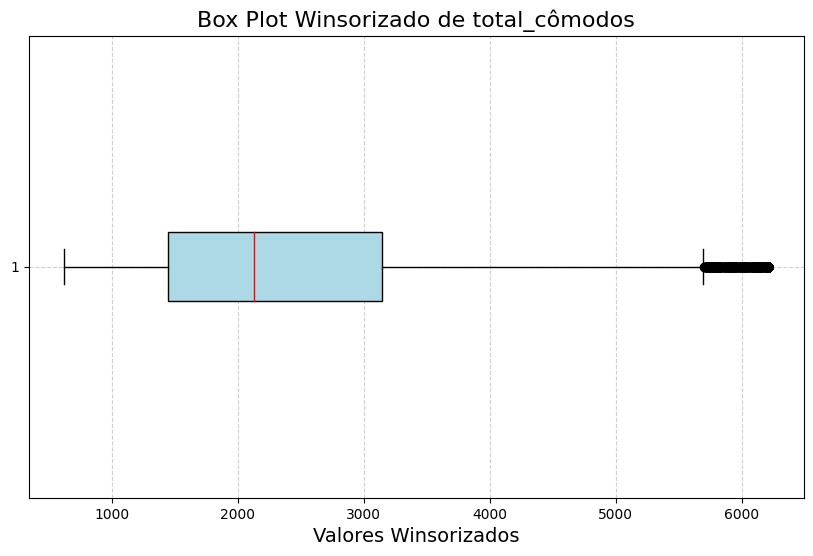

In [24]:
from scipy.stats import mstats

# Aplicar Winsorization para limitar a influ√™ncia de outliers
winsorized_data = mstats.winsorize(housing[feature1], limits=[0.05, 0.05])

# Configurar e criar o box plot para os dados Winsorizados
plt.figure(figsize=(10, 6))
plt.boxplot(winsorized_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))
plt.title(f'Box Plot Winsorizado de {feature1}', fontsize=16)
plt.xlabel('Valores Winsorizados', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### **Algoritmos Robustos**



**Regress√£o Robusta:** Usar algoritmos de regress√£o robustos a *outliers*, como Regress√£o de M-estimadores.

**M√©todos de Detec√ß√£o de Outliers:** Algoritmos como [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) ou [One-Class SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) podem ser usados para detectar e tratar outliers.

### **Codifica√ß√£o de Vari√°veis Categ√≥ricas:**

Como muitos algoritmos de aprendizado de m√°quina exigem vari√°veis num√©ricas, vari√°veis categ√≥ricas devem ser convertidas em representa√ß√µes num√©ricas. T√©cnicas comuns para essa convers√£o incluem:

- **[One-Hot Encoding:](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)** Para cada valor distinto de uma vari√°vel categ√≥rica, cria-se uma nova coluna bin√°ria (com valores 0 ou 1). O valor "1" indica a presen√ßa da categoria em uma determinada observa√ß√£o, enquanto "0" indica a aus√™ncia. Esse m√©todo evita que os modelos interpretem a ordem ou rela√ß√£o entre os valores categ√≥ricos, preservando a natureza categ√≥rica dos dados.

In [25]:
# Aplicar One-Hot Encoding na coluna 'proximidade_ao_oceano'
data_one_hot_encoded = pd.get_dummies(housing, columns=['proximidade_ao_oceano'], prefix='', prefix_sep='', drop_first=True)

# Exibir as primeiras 5 linhas do DataFrame com One-Hot Encoding
data_one_hot_encoded.head()

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  total_quartos  \
0    -122.23     37.88                  41.0          880.0          129.0   
1    -122.22     37.86                  21.0         7099.0         1106.0   
2    -122.24     37.85                  52.0         1467.0          190.0   
3    -122.25     37.85                  52.0         1274.0          235.0   
4    -122.25     37.85                  52.0         1627.0          280.0   

   popula√ß√£o  domic√≠lios  renda_mediana  valor_mediano_casas  INTERIOR  \
0      322.0       126.0         8.3252             452600.0     False   
1     2401.0      1138.0         8.3014             358500.0     False   
2      496.0       177.0         7.2574             352100.0     False   
3      558.0       219.0         5.6431             341300.0     False   
4      565.0       259.0         3.8462             342200.0     False   

   MENOS DE 1H DO OCEANO  PERTO DA BA√çA  PERTO DO OCEANO  
0                  False           True            False  
1                  False           True            False  
2                  False           True            False  
3                  False           True            False  
4                  False           True            False

- **[Label Encoding:](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)** Cada valor √∫nico da categoria recebe um n√∫mero exclusivo. Ao contr√°rio do one-hot encoding, o label encoding mant√©m uma ordem impl√≠cita entre os valores, o que pode ser problem√°tico em alguns casos, pois os modelos podem interpretar essas categorias como ordinais, mesmo que elas n√£o tenham uma rela√ß√£o natural de hierarquia.

In [26]:
# Aplicar Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_label_encoded = housing.copy()  # Criar uma c√≥pia para n√£o modificar o DataFrame original
data_label_encoded['proximidade_ao_oceano'] = label_encoder.fit_transform(data_label_encoded['proximidade_ao_oceano'])

# 5. Exibir as 5 primeiras linhas do DataFrame com Label Encoding
print("\nDataFrame com Label Encoding:")
data_label_encoded.head()


DataFrame com Label Encoding:


longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  total_quartos  \
0    -122.23     37.88                  41.0          880.0          129.0   
1    -122.22     37.86                  21.0         7099.0         1106.0   
2    -122.24     37.85                  52.0         1467.0          190.0   
3    -122.25     37.85                  52.0         1274.0          235.0   
4    -122.25     37.85                  52.0         1627.0          280.0   

   popula√ß√£o  domic√≠lios  renda_mediana  valor_mediano_casas  \
0      322.0       126.0         8.3252             452600.0   
1     2401.0      1138.0         8.3014             358500.0   
2      496.0       177.0         7.2574             352100.0   
3      558.0       219.0         5.6431             341300.0   
4      565.0       259.0         3.8462             342200.0   

   proximidade_ao_oceano  
0                      3  
1                      3  
2                      3  
3                      3  
4                      3

### **Cria√ß√£o de Novas *Features*:**

A engenharia de *features* envolve a cria√ß√£o de novas vari√°veis derivadas das j√° existentes, com o objetivo de extrair informa√ß√µes adicionais e melhorar a performance dos modelos. Isso pode ser realizado por meio da combina√ß√£o de vari√°veis ou da aplica√ß√£o de transforma√ß√µes, como polin√¥mios ou agrega√ß√µes, para capturar padr√µes mais complexos. Um ponto de partida t√©cnico eficaz √© a an√°lise de correla√ß√µes entre vari√°veis. A matriz de correla√ß√£o, que mensura rela√ß√µes lineares entre as *features*, pode ser utilizada para identificar intera√ß√µes significativas, guiando a cria√ß√£o de novas *features* que capturam melhor as influ√™ncias sobre a vari√°vel alvo. Essas novas vari√°veis podem incluir intera√ß√µes entre vari√°veis, agrupamentos de categorias, ou transforma√ß√µes n√£o lineares que aumentam a capacidade preditiva do modelo.

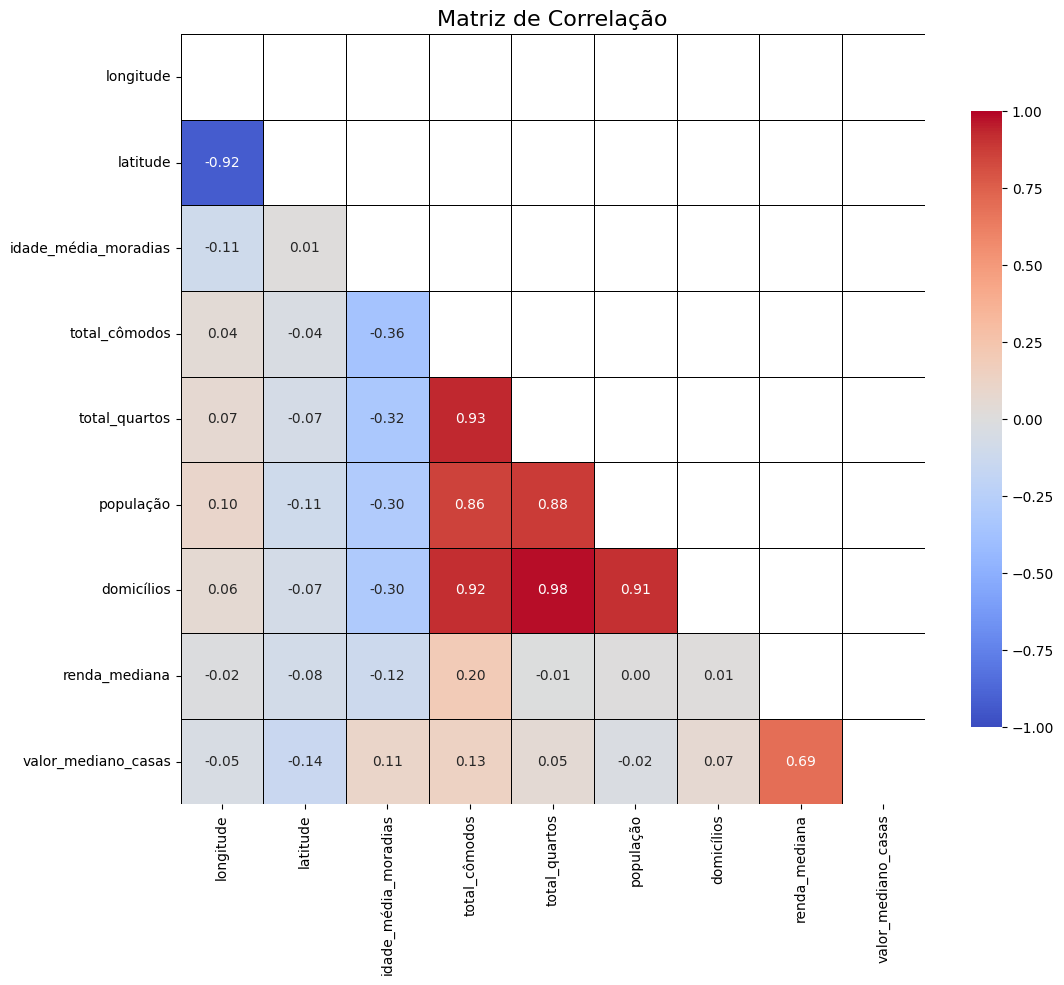

In [27]:
import seaborn as sns

# Calcular a matriz de correla√ß√£o
corr_matrix = housing.corr(numeric_only=True)

# Criar uma m√°scara para esconder a parte superior da matriz de correla√ß√£o
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o mapa de calor da matriz de correla√ß√£o, aplicando a m√°scara
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='black',
    vmin=-1, vmax=1,
    cbar_kws={"shrink": .8},
    mask=mask # Aplicar a m√°scara para esconder a parte superior
)

# Adicionar t√≠tulo ao gr√°fico
plt.title("Matriz de Correla√ß√£o", fontsize=16)

# Exibir o gr√°fico
plt.show()

A multicolinearidade ocorre quando duas ou mais vari√°veis independentes em um modelo possuem alta correla√ß√£o, prejudicando a efici√™ncia dos algoritmos de aprendizado de m√°quina ao introduzir redund√¢ncia informacional. Isso dificulta a identifica√ß√£o dos impactos individuais das vari√°veis no modelo, levando a coeficientes inst√°veis e maior vari√¢ncia nas estimativas. Em geral, correla√ß√µes acima de um limiar predefinido (comumente 0.8) sugerem multicolinearidade significativa. O c√≥digo a seguir identifica essas vari√°veis altamente correlacionadas, permitindo a aplica√ß√£o de estrat√©gias para mitigar o problema, como a remo√ß√£o de uma das vari√°veis redundantes, combina√ß√£o de features, ou uso de t√©cnicas de regulariza√ß√£o (ex.: Lasso, Ridge), que penalizam a presen√ßa de vari√°veis correlacionadas e controlam seus efeitos no modelo.







In [28]:
# Definir um limiar de correla√ß√£o
limiar_corr = 0.8

# Criar uma lista para armazenar as vari√°veis altamente correlacionadas
variaveis_altamente_correlacionadas = []

# Iterar sobre a matriz de correla√ß√£o para identificar vari√°veis correlacionadas acima do limiar
for coluna in corr_matrix.columns:
    for linha in corr_matrix.index:
        if abs(corr_matrix.loc[linha, coluna]) > limiar_corr and coluna != linha:
            variaveis_altamente_correlacionadas.append((linha, coluna, corr_matrix.loc[linha, coluna]))

# Remover duplicatas (pares invertidos) da lista
variaveis_altamente_correlacionadas = list(set([tuple(sorted(tup[:2])) + (tup[2],) for tup in variaveis_altamente_correlacionadas]))

# Exibir as vari√°veis altamente correlacionadas
variaveis_altamente_correlacionadas

[('domic√≠lios', 'popula√ß√£o', 0.9072222660959659),
 ('total_c√¥modos', 'total_quartos', 0.9303795046865031),
 ('domic√≠lios', 'total_quartos', 0.9797282708045709),
 ('latitude', 'longitude', -0.9246644339150368),
 ('popula√ß√£o', 'total_quartos', 0.8777467431529311),
 ('popula√ß√£o', 'total_c√¥modos', 0.8571259728659829),
 ('domic√≠lios', 'total_c√¥modos', 0.9184844926543111)]

Para lidar com esse problema e reduzir a redund√¢ncia entre vari√°veis, uma abordagem eficaz √© criar novas features que sintetizem a informa√ß√£o de forma mais eficiente. Assim, foram propostas as seguintes features derivadas:

- **c√¥modos_por_casa:** raz√£o entre o total de c√¥modos e o n√∫mero de domic√≠lios, representando a m√©dia de c√¥modos por resid√™ncia.

In [29]:
# Cria uma c√≥pia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'c√¥modos_por_casa'
housing_copy["c√¥modos_por_casa"] = housing_copy["total_c√¥modos"] / housing_copy["domic√≠lios"]

# Calcular a matriz de correla√ß√£o entre as vari√°veis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['c√¥modos_por_casa', 'total_c√¥modos', 'domic√≠lios', 'valor_mediano_casas']].corr()

# Filtrar as correla√ß√µes das vari√°veis com o desfecho 'valor_mediano_casas', exceto a pr√≥pria vari√°vel
correlacoes_com_desfecho = correlacoes.loc[['c√¥modos_por_casa', 'total_c√¥modos', 'domic√≠lios'], 'valor_mediano_casas']

# Exibir as correla√ß√µes
correlacoes_com_desfecho

c√¥modos_por_casa    0.151948
total_c√¥modos       0.134153
domic√≠lios          0.065843
Name: valor_mediano_casas, dtype: float64

A an√°lise indica que a vari√°vel `c√¥modos_por_casa` √© mais relevante para prever o `valor_mediano_casas` do que as vari√°veis `total_c√¥modos` e `domic√≠lios`, pois apresenta um coeficiente de correla√ß√£o mais alto. Isso significa que a rela√ß√£o entre o n√∫mero de c√¥modos e a quantidade de domic√≠lios √© um indicativo mais forte do valor das casas, tornando essa m√©trica mais √∫til para a modelagem preditiva.

- **razao_quartos:** Propor√ß√£o de quartos em rela√ß√£o ao total de c√¥modos, indicando a fra√ß√£o dos c√¥modos que s√£o quartos.







In [30]:
# Cria uma c√≥pia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'razao_quartos'
housing_copy["razao_quartos"] = housing_copy["total_quartos"] / housing_copy["total_c√¥modos"]

# Calcular a matriz de correla√ß√£o entre as vari√°veis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['razao_quartos', 'total_quartos', 'total_c√¥modos', 'valor_mediano_casas']].corr()

# Filtrar as correla√ß√µes das vari√°veis com o desfecho 'valor_mediano_casas', exceto a pr√≥pria vari√°vel
correlacoes_com_desfecho = correlacoes['valor_mediano_casas'].drop('valor_mediano_casas')

# Exibir as correla√ß√µes
correlacoes_com_desfecho

razao_quartos   -0.255880
total_quartos    0.049686
total_c√¥modos    0.134153
Name: valor_mediano_casas, dtype: float64

A `razao_quartos`, com uma correla√ß√£o negativa significativa, sugere que um aumento na raz√£o entre o n√∫mero de quartos e o total de c√¥modos pode estar associado a uma diminui√ß√£o no valor mediano das casas. Isso pode indicar que, em √°reas onde a propor√ß√£o de quartos √© maior em rela√ß√£o ao total de c√¥modos, o valor das propriedades tende a ser menor. O `total_quartos` apresenta uma correla√ß√£o muito fraca com o `valor_mediano_casas`, indicando que o n√∫mero absoluto de quartos tem pouco impacto na valoriza√ß√£o das casas. O `total_c√¥modos` possui uma correla√ß√£o positiva moderada com o `valor_mediano_casas`, indicando que, √† medida que o n√∫mero total de c√¥modos aumenta, o valor mediano das casas tende a aumentar tamb√©m, embora n√£o de maneira t√£o forte quanto a razao_quartos sugere.

- **pessoas_por_casa:** raz√£o entre a popula√ß√£o e o n√∫mero de domic√≠lios, indicando a m√©dia de habitantes por resid√™ncia.

In [31]:
# Cria uma c√≥pia do DataFrame
housing_copy = housing.copy()

# Criar a nova feature 'pessoas_por_casa'
housing_copy["pessoas_por_casa"] = housing_copy["popula√ß√£o"] / housing_copy["domic√≠lios"]

# Calcular a matriz de correla√ß√£o entre as vari√°veis de interesse e 'valor_mediano_casas'
correlacoes = housing_copy[['pessoas_por_casa', 'popula√ß√£o', 'domic√≠lios', 'valor_mediano_casas']].corr()

# Filtrar as correla√ß√µes das vari√°veis com o desfecho 'valor_mediano_casas', exceto a pr√≥pria vari√°vel
correlacoes_com_desfecho = correlacoes['valor_mediano_casas'].drop('valor_mediano_casas')

# Exibir as correla√ß√µes
correlacoes_com_desfecho

pessoas_por_casa   -0.023737
popula√ß√£o          -0.024650
domic√≠lios          0.065843
Name: valor_mediano_casas, dtype: float64

A `pessoas_por_casa` tem uma correla√ß√£o negativa muito fraca com o `valor_mediano_casas`, indicando que a raz√£o de pessoas por domic√≠lio n√£o tem um impacto significativo no valor das casas. Esse resultado sugere que o n√∫mero m√©dio de moradores por casa n√£o √© um fator determinante na valoriza√ß√£o do im√≥vel. A `popula√ß√£o` tamb√©m apresenta uma correla√ß√£o negativa e muito fraca com o `valor_mediano_casas`, o que indica que o tamanho total da popula√ß√£o n√£o est√° relacionado de maneira percept√≠vel ao valor das propriedades. A `domic√≠lios`, com uma correla√ß√£o positiva fraca, sugere que um aumento no n√∫mero de domic√≠lios est√° associado a uma leve eleva√ß√£o no valor mediano das casas, embora essa rela√ß√£o seja fraca.

#### **Escalonamento e Normalizac√£o**

√â um procedimento de transforma√ß√£o de dados que normaliza as *features* para uma escala comum. Normalmente, isso √© feito ajustando os dados para um intervalo fixo, como [0, 1], ou para uma distribui√ß√£o com m√©dia zero e desvio padr√£o um. O objetivo √© assegurar que cada *feature* tenha igual import√¢ncia na an√°lise, evitando a domin√¢ncia de vari√°veis com magnitudes diferentes. Modelos baseados em dist√¢ncias, como [regress√£o log√≠stica](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [m√°quinas de vetores de suporte](https://scikit-learn.org/stable/modules/svm.html) (SVM) e k-vizinhos mais pr√≥ximos (KNN), s√£o sens√≠veis √†s escalas das vari√°veis e, portanto, se beneficiam da normaliza√ß√£o. Isso ocorre porque esses modelos calculam dist√¢ncias ou coeficientes entre as vari√°veis, sendo afetados por discrep√¢ncias nas magnitudes. Por outro lado, modelos como √°rvores de decis√£o, florestas aleat√≥rias e boosting (como XGBoost), n√£o exigem normaliza√ß√£o, pois as divis√µes ou splits nas √°rvores s√£o baseadas em regras de decis√£o que utilizam limites absolutos dos dados. Assim, esses modelos s√£o naturalmente invariantes √† escala das vari√°veis, tornando a normaliza√ß√£o desnecess√°ria.

- **Normaliza√ß√£o Min-Max:** escala os dados para um intervalo espec√≠fico, geralmente [0, 1].

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Criar o normalizador Min-Max
scaler = MinMaxScaler()

# Aplicar a normaliza√ß√£o
housing_normalizado = pd.DataFrame(scaler.fit_transform(data_one_hot_encoded), columns=data_one_hot_encoded.columns)

# Verificar os primeiros registros do DataFrame normalizado
housing_normalizado.head()

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  total_quartos  \
0   0.211155  0.567481              0.784314       0.022331       0.019863   
1   0.212151  0.565356              0.392157       0.180503       0.171477   
2   0.210159  0.564293              1.000000       0.037260       0.029330   
3   0.209163  0.564293              1.000000       0.032352       0.036313   
4   0.209163  0.564293              1.000000       0.041330       0.043296   

   popula√ß√£o  domic√≠lios  renda_mediana  valor_mediano_casas  INTERIOR  \
0   0.008941    0.020556       0.539668             0.902266       0.0   
1   0.067210    0.186976       0.538027             0.708247       0.0   
2   0.013818    0.028943       0.466028             0.695051       0.0   
3   0.015555    0.035849       0.354699             0.672783       0.0   
4   0.015752    0.042427       0.230776             0.674638       0.0   

   MENOS DE 1H DO OCEANO  PERTO DA BA√çA  PERTO DO OCEANO  
0                    0.0            1.0              0.0  
1                    0.0            1.0              0.0  
2                    0.0            1.0              0.0  
3                    0.0            1.0              0.0  
4                    0.0            1.0              0.0

**Padroniza√ß√£o (Z-Score Normalization):** A padroniza√ß√£o transforma os dados para que tenham m√©dia zero e desvio padr√£o um.


In [33]:
from sklearn.preprocessing import StandardScaler

# Criar o normalizador Z-Score
scaler = StandardScaler()

# Aplicar a padroniza√ß√£o
housing_padronizado = pd.DataFrame(scaler.fit_transform(data_one_hot_encoded), columns=data_one_hot_encoded.columns)

# Verificar os primeiros registros do DataFrame padronizado
housing_padronizado.head()

longitude  latitude  idade_m√©dia_moradias  total_c√¥modos  total_quartos  \
0  -1.327835  1.052548              0.982143      -0.804819      -0.970325   
1  -1.322844  1.043185             -0.607019       2.045890       1.348276   
2  -1.332827  1.038503              1.856182      -0.535746      -0.825561   
3  -1.337818  1.038503              1.856182      -0.624215      -0.718768   
4  -1.337818  1.038503              1.856182      -0.462404      -0.611974   

   popula√ß√£o  domic√≠lios  renda_mediana  valor_mediano_casas  INTERIOR  \
0  -0.974429   -0.977033       2.344766             2.129631 -0.681889   
1   0.861439    1.669961       2.332238             1.314156 -0.681889   
2  -0.820777   -0.843637       1.782699             1.258693 -0.681889   
3  -0.766028   -0.733781       0.932968             1.165100 -0.681889   
4  -0.759847   -0.629157      -0.012881             1.172900 -0.681889   

   MENOS DE 1H DO OCEANO  PERTO DA BA√çA  PERTO DO OCEANO  
0              -0.891156       2.830742        -0.384466  
1              -0.891156       2.830742        -0.384466  
2              -0.891156       2.830742        -0.384466  
3              -0.891156       2.830742        -0.384466  
4              -0.891156       2.830742        -0.384466

**ATEN√á√ÉO:** A escolha da t√©cnica de escalonamento √© importante para o desempenho da classifica√ß√£o, como demonstrado no estudo [Meta-Scaler: A Meta-Learning Framework for the Selection of Scaling Techniques](https://ieeexplore.ieee.org/document/10445017), que discute a influ√™ncia das t√©cnicas de escalonamento no desempenho dos algoritmos de aprendizado de m√°quina. A escolha inadequada pode comprometer a efic√°cia do modelo, destacando a import√¢ncia de uma abordagem fundamentada na sele√ß√£o do m√©todo de escalonamento apropriado para os dados espec√≠ficos em an√°lise.


## **4. Sele√ß√£o de Features:**

A sele√ß√£o de *features* √© um passo cr√≠tico no pr√©-processamento de dados em projetos de aprendizado de m√°quina, onde o objetivo √© identificar e selecionar as vari√°veis mais relevantes para o modelo. Este processo √© fundamental para melhorar o desempenho do modelo, reduzir a complexidade computacional e evitar problemas como *overfitting*. Existem v√°rias abordagens para a sele√ß√£o de *features*, que podem ser categorizadas em tr√™s principais tipos:



### **M√©todos de Filtragem (Filter Methods)**




Operam de forma independente do modelo de aprendizado de m√°quina, utilizando m√©tricas estat√≠sticas para avaliar a relev√¢ncia individual de cada feature em rela√ß√£o √† vari√°vel alvo. Essa abordagem oferece uma maneira computacionalmente eficiente de reduzir a dimensionalidade dos dados, removendo features irrelevantes ou redundantes antes do treinamento do modelo.

### **M√©todos de Wrapper (Wrapper Methods)**


Representam uma classe de t√©cnicas de sele√ß√£o de *features* que se distinguem por sua intera√ß√£o direta com o modelo de aprendizado de m√°quina. Ao contr√°rio dos m√©todos de filtro, que avaliam as *features* de forma independente, os m√©todos wrapper utilizam o desempenho do modelo como crit√©rio para selecionar o subconjunto √≥timo de *features*.



### **M√©todos Embutidos (Embedded Methods)**

 A principal caracter√≠stica dos m√©todos embutidos √© a sua capacidade de atribuir pesos ou import√¢ncia √†s *features* durante o processo de treinamento. Esses pesos refletem a contribui√ß√£o de cada feature para o desempenho do modelo, permitindo a identifica√ß√£o e sele√ß√£o das *features* mais relevantes. A sele√ß√£o pode ocorrer de forma expl√≠cita, descartando *features* com pesos baixos, ou impl√≠cita, atrav√©s da regulariza√ß√£o, que penaliza o uso de *features* menos importantes.

## **5. Treinamento do Modelo**

O treinamento de modelos de aprendizado de m√°quina √© o processo central no qual um algoritmo aprende a partir de dados, ajustando seus par√¢metros internos para minimizar o erro em rela√ß√£o a uma tarefa espec√≠fica. √â nessa fase que o modelo adquire a capacidade de generalizar padr√µes e fazer previs√µes ou tomar decis√µes sobre novos dados n√£o vistos durante o treinamento. O treinamento de modelos de aprendizado de m√°quina apresenta diversos desafios, incluindo:

- **Escolha do Algoritmo:** √â importante considerar fatores como a complexidade do modelo, a interpretabilidade dos resultados e a capacidade de lidar com diferentes tipos de dados.

- **Hiperpar√¢metros:** Cada algoritmo possui hiperpar√¢metros que controlam seu comportamento e influenciam o aprendizado. A escolha dos valores ideais para esses hiperpar√¢metros √© crucial para otimizar o desempenho do modelo e evitar *overfitting* ou *underfitting*.

- **Qualidade dos Dados:** A qualidade dos dados de treinamento √© fundamental para o sucesso do modelo. Dados ruidosos, incompletos ou com vieses podem prejudicar o aprendizado e levar a resultados insatisfat√≥rios.

- **Recursos Computacionais:** O treinamento de modelos complexos, especialmente com grandes volumes de dados, pode exigir recursos computacionais significativos em termos de mem√≥ria, processamento e tempo.

### **A Separa√ß√£o em Features e Target**

Para iniciar o treinamento de um modelo de aprendizado de m√°quina supervisionado, √© fundamental separar os dados em duas partes:

In [34]:
X = housing.drop(columns=['valor_mediano_casas']) # S√£o as vari√°veis independentes ou preditoras que ser√£o usadas para fazer previs√µes.
y = housing['valor_mediano_casas'] # √â a vari√°vel dependente ou alvo que queremos prever.

### **Preparando os Dados para o Aprendizado de M√°quina**

[Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) s√£o uma ferramenta robusta no contexto de aprendizado de m√°quina que facilitam a automa√ß√£o e a organiza√ß√£o de sequ√™ncias de etapas de transforma√ß√£o de dados e treinamento de modelos. Eles oferecem uma estrutura eficiente para encadear opera√ß√µes, desde o pr√©-processamento dos dados at√© a avalia√ß√£o do modelo final, garantindo clareza e reprodutibilidade no fluxo de trabalho. Neste projeto, utilizaremos a [√°rvore de regress√£o](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) como o modelo para a an√°lise dos dados. A implementa√ß√£o seguir√° os passos essenciais, incluindo:










#### **1. Criar um pipeline para imputar vari√°veis num√©ricas**.








In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline_numerico = Pipeline([
    ('imputacao', SimpleImputer(strategy="median")),  # Imputa√ß√£o de valores ausentes com a mediana
])

#### **2. Criar um pipeline para codificar vari√°veis categ√≥ricas**









In [36]:
from sklearn.preprocessing import OneHotEncoder

pipeline_categorico = Pipeline(steps=[
    ('codificador', OneHotEncoder())  # Ignorar categorias desconhecidas e gerar uma sa√≠da densa
])

#### **3. Criar um pr√©-processador que aplica diferentes transforma√ß√µes a colunas espec√≠ficas**

In [37]:
from sklearn.compose import ColumnTransformer

# Selecionar colunas num√©ricas e categ√≥ricas
colunas_numericas = list(X.select_dtypes(include=['float64', 'int64']).columns)
colunas_categoricas = ['proximidade_ao_oceano']

# Criar um pr√©-processador que aplica diferentes transforma√ß√µes a colunas espec√≠ficas
preprocessador = ColumnTransformer([
    ('num', pipeline_numerico, colunas_numericas),  # Aplicar pipeline num√©rico √†s colunas num√©ricas
    ('cat', pipeline_categorico, colunas_categoricas),  # Aplicar pipeline categ√≥rico √†s colunas categ√≥ricas
])

### **Treinando e Avaliando no Conjunto de Completo**




Com o *pipeline* devidamente configurado para processar tanto vari√°veis num√©ricas quanto categ√≥ricas, garantimos que os dados sejam adequadamente pr√©-processados e preparados para o modelo de maneira eficiente. A abordagem modular e estruturada dos *pipelines* permite a integra√ß√£o de m√∫ltiplas etapas de transforma√ß√£o, assegurando que as mesmas opera√ß√µes sejam aplicadas de forma consistente durante as fases de treinamento e valida√ß√£o, minimizando o risco de vazamento de dados e maximizando a robustez do modelo.








In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Criar um pipeline completo que inclui o pr√©-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Treinar o modelo
pipeline.fit(X, y)

# Fazer previs√µes
y_pred = pipeline.predict(X)

# Avaliar o modelo
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir os resultados
print(f'RMSE: {rmse}')
print(f'R¬≤: {r2}')

RMSE: 0.0
R¬≤: 1.0


Os resultados obtidos no treinamento e avalia√ß√£o do modelo, com um erro quadr√°tico m√©dio (RMSE) de 0.0 e um coeficiente de determina√ß√£o (R¬≤) de 1.0, evidenciam um caso claro de *overfitting*. Esse fen√¥meno indica que o modelo se ajustou perfeitamente aos dados de treinamento, memorizando-os em vez de extrair e generalizar os padr√µes subjacentes. O *overfitting* ocorre quando a complexidade do modelo √© excessiva em rela√ß√£o √† quantidade e variabilidade dos dados dispon√≠veis, resultando em um desempenho excepcional nos dados de treinamento, mas comprometendo a capacidade de generaliza√ß√£o para novos dados.



### **Treinamento no Conjunto de Treino e Avalia√ß√£o no Conjunto de Teste**







Para confirmar o *overfitting*, vamos avaliar o modelo em um conjunto de dados de teste separado, que ele nunca viu antes. Se o desempenho no conjunto de teste for significativamente pior do que no conjunto de treinamento, isso confirmar√° a presen√ßa de *overfitting*. A fun√ß√£o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do pacote *sklearn* √© usada para dividir um conjunto de dados em dois subconjuntos: treinamento e teste.

In [39]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo no conjunto de treinamento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputacao',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['longitude', 'latitude',
                                                   'idade_m√©dia_moradias',
                                                   'total_c√¥modos',
                                                   'total_quartos', 'popula√ß√£o',
                                                   'domic√≠lios',
                                                   'renda_mediana']),
                                                 ('cat',
                                                  Pipeline(steps=[('codificador',
                                                                   OneHotEncoder())]),
                                                  ['proximidade_ao_oceano'])])),
                ('modelo', DecisionTreeRegressor(random_state=42))])

#### **Avaliando os resultados do conjunto de treino**


In [40]:
# Fazer previs√µes no conjunto de treino
y_train_pred = pipeline.predict(X_train)

# Avaliar o modelo no conjunto de treino
rmse_train = root_mean_squared_error(y_train, y_train_pred)  # RMSE
r2_train = r2_score(y_train, y_train_pred)  # Coeficiente de determina√ß√£o

# Imprimir os resultados do conjunto de treino
print("Resultados no Conjunto de Treino:")
print(f'RMSE: {rmse_train:.4f}')
print(f'R¬≤: {r2_train:.4f}')

Resultados no Conjunto de Treino:
RMSE: 0.0000
R¬≤: 1.0000


Os resultados obtidos no conjunto de treinamento continuam indicando um ajuste perfeito do modelo aos dados

#### **Avaliando os resultados do conjunto de teste**

In [41]:
# Fazer previs√µes no conjunto de teste
y_test_pred = pipeline.predict(X_test)

# Avaliar o modelo no conjunto de teste
rmse_test = root_mean_squared_error(y_test, y_test_pred)  # RMSE
r2_test = r2_score(y_test, y_test_pred)  # Coeficiente de determina√ß√£o

# Imprimir os resultados do conjunto de teste
print("Resultados no Conjunto de Teste:")
print(f'RMSE: {rmse_test:.4f}')
print(f'R¬≤: {r2_test:.4f}')

Resultados no Conjunto de Teste:
RMSE: 68734.8847
R¬≤: 0.6395


Os resultados no conjunto de teste mostram um desempenho consideravelmente inferior em rela√ß√£o ao conjunto de treinamento. O RMSE foi de 68734.8847, indicando que o modelo possui uma margem de erro significativa nas previs√µes. O coeficiente de determina√ß√£o (R¬≤) de 0,6395 sugere que o modelo explica apenas 63,95% da varia√ß√£o dos dados de teste, confirmando a hip√≥tese de *overfitting*.

### ***Overfitting* em √Årvores**

Em uma √°rvore de regress√£o, o *overfitting* ocorre com frequ√™ncia quando a profundidade da √°rvore aumenta excessivamente, resultando em uma modelagem detalhada dos ru√≠dos e particularidades do conjunto de treinamento. Isso compromete sua capacidade de generaliza√ß√£o, reduzindo o desempenho preditivo em dados n√£o observados.









In [42]:
# Extraia o modelo treinado do pipeline
modelo_treinado = pipeline.named_steps['modelo']

# Acesse e imprima a profundidade da √°rvore
profundidade = modelo_treinado.get_depth()
print(f"A profundidade da √°rvore √©: {profundidade}")

A profundidade da √°rvore √©: 37


Para avaliar o impacto da profundidade de uma √°rvore de regress√£o, √© essencial quantificar os erros em ambos os conjuntos, de treino e teste, em diversos valores de profundidade m√°xima. Essa metodologia permite uma an√°lise detalhada do comportamento do modelo em rela√ß√£o ao ajuste aos dados, facilitando a detec√ß√£o de sinais de *underfitting* e *overfitting*. O par√¢metro `max_depth` estabelece um limite para a profundidade da √°rvore, restringindo o n√∫mero de n√≠veis que ela pode alcan√ßar. Essa limita√ß√£o previne a complexidade excessiva da √°rvore, reduzindo o risco de ajuste excessivo aos dados de treinamento e promovendo uma melhor generaliza√ß√£o em conjuntos de dados n√£o vistos.








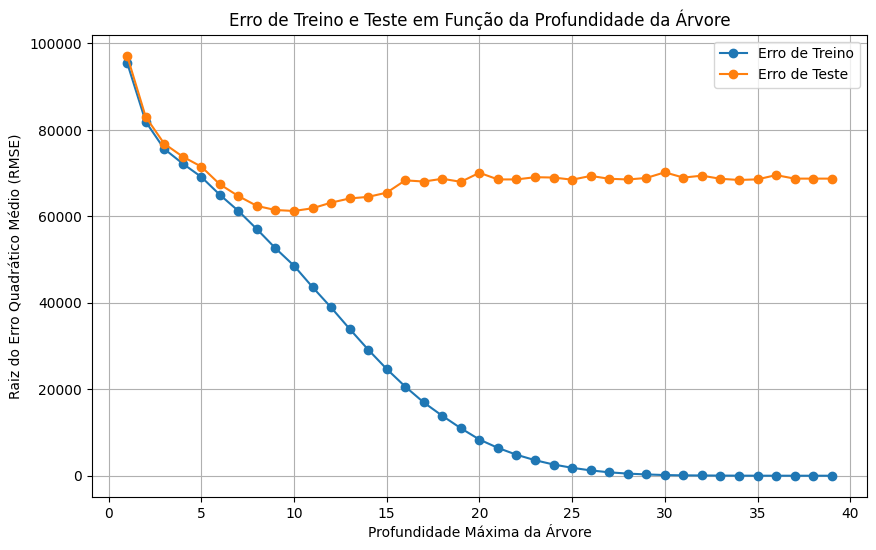

In [44]:
# Definir intervalos de profundidade para testar
max_depths = np.arange(1, 40)

# Listas para armazenar erros de treino e teste
train_errors = []
test_errors = []

# Loop para testar diferentes profundidades
for depth in max_depths:
    # Criar o pipeline com a profundidade atual
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('modelo', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])

    # Treinar o modelo
    pipeline.fit(X_train, y_train)

    # Fazer previs√µes nos conjuntos de treino e teste
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calcular o erro quadr√°tico m√©dio (MSE) para treino e teste
    train_mse = root_mean_squared_error(y_train, y_train_pred)
    test_mse = root_mean_squared_error(y_test, y_test_pred)

    # Armazenar os erros
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Erro de Treino', marker='o')
plt.plot(max_depths, test_errors, label='Erro de Teste', marker='o')
plt.xlabel('Profundidade M√°xima da √Årvore')
plt.ylabel('Raiz do Erro Quadr√°tico M√©dio (RMSE)')
plt.title('Erro de Treino e Teste em Fun√ß√£o da Profundidade da √Årvore')
plt.legend()
plt.grid(True)
plt.show()

### **Estrat√©gias para Combater o *Overfitting***

Apresenta-se um fluxograma t√≠pico do fluxo de trabalho de valida√ß√£o cruzada (Cross-validation), uma metodologia essencial para a avalia√ß√£o e otimiza√ß√£o do desempenho de modelos de aprendizado de m√°quina durante o processo de treinamento. Essa abordagem permite uma an√°lise sistem√°tica da efic√°cia dos modelos, promovendo uma estimativa mais precisa da capacidade de generaliza√ß√£o em dados n√£o vistos.








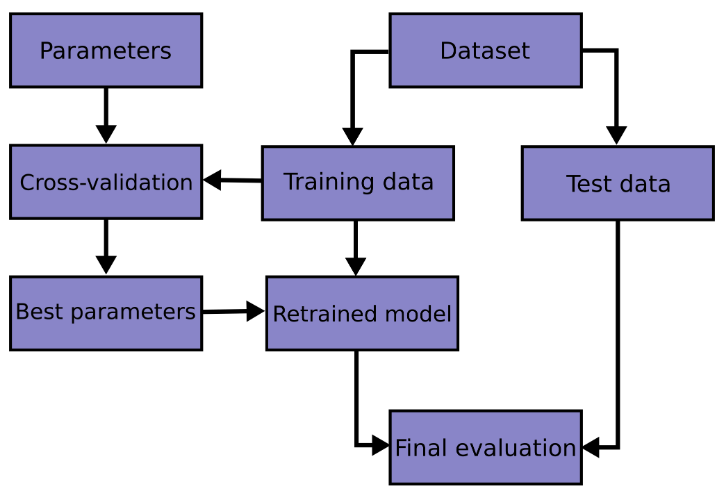

A valida√ß√£o cruzada √© uma t√©cnica que envolve a divis√£o do conjunto de dados em m√∫ltiplos subconjuntos, chamados de folds. Nesse processo, o modelo √© treinado em um subconjunto espec√≠fico dos dados e, em seguida, testado em outro subconjunto, garantindo uma avalia√ß√£o de desempenho mais robusta. Essa abordagem minimiza o vi√©s associado √† superexposi√ß√£o aos dados de treinamento, proporcionando uma estimativa mais precisa da capacidade de generaliza√ß√£o do modelo em dados n√£o vistos.















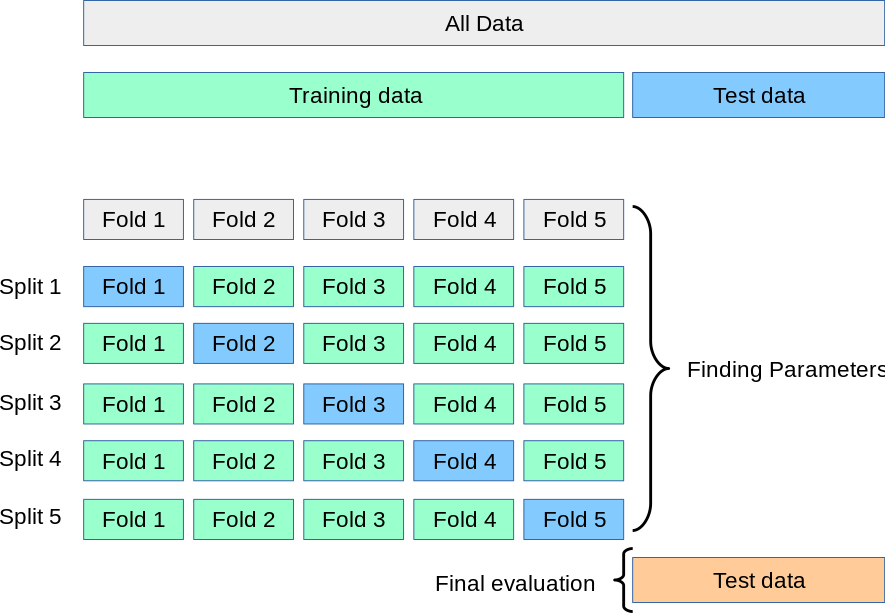

A seguir, apresenta-se uma implementa√ß√£o pr√°tica da valida√ß√£o cruzada utilizando a t√©cnica K-Fold.

In [45]:
from sklearn.model_selection import KFold

# Definir o n√∫mero de folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Criar um pipeline completo que inclui o pr√©-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Listas para armazenar os resultados de RMSE e R¬≤
rmse_scores = []
r2_scores = []

# Loop para realizar a valida√ß√£o cruzada
for train_index, test_index in kf.split(X_train):
    # Usar iloc para indexar corretamente os DataFrames
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # Treinar o modelo
    pipeline.fit(X_fold_train, y_fold_train)

    # Fazer previs√µes
    y_pred = pipeline.predict(X_fold_val)

    # Avaliar o modelo
    rmse = root_mean_squared_error(y_fold_val, y_pred)
    r2 = r2_score(y_fold_val, y_pred)

    # Armazenar os resultados
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calcular m√©dias e desvios padr√£o
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Imprimir os resultados
print(f'M√©dia RMSE: {mean_rmse:.3f} ¬± {std_rmse:.3f}')
print(f'M√©dia R¬≤: {mean_r2:.3f} ¬± {std_r2:.3f}')


M√©dia RMSE: 62561.838 ¬± 1472.591
M√©dia R¬≤: 0.707 ¬± 0.008


O ajuste de hiperpar√¢metros √© o processo de otimiza√ß√£o dos par√¢metros que n√£o s√£o aprendidos diretamente pelo modelo durante o treinamento, mas que afetam seu desempenho, como a profundidade m√°xima em √°rvores. Uma estrat√©gia comum para ajustar hiperpar√¢metros √© a busca em grade (grid search), onde um espa√ßo de hiperpar√¢metros √© definido e o modelo √© avaliado para cada combina√ß√£o de par√¢metros usando valida√ß√£o cruzada.

In [46]:
from sklearn.model_selection import GridSearchCV

# Criar um pipeline completo que inclui o pr√©-processamento e futuras etapas de modelagem
pipeline = Pipeline([
    ('preprocessador', preprocessador),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

# Definir a grade de par√¢metros para otimiza√ß√£o
param_grid = {
    'modelo__max_depth': [None, 5, 10, 15],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2', n_jobs=-1)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Extrair os melhores par√¢metros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Avaliar o desempenho do modelo otimizado
y_pred = best_model.predict(X_test)

# Calcular RMSE e R¬≤
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Imprimir os melhores par√¢metros e os resultados de desempenho
print(f'Melhores par√¢metros: {best_params}')
print(f'RMSE: {rmse:.3f}')
print(f'R¬≤: {r2:.3f}')


Melhores par√¢metros: {'modelo__max_depth': 10, 'modelo__min_samples_leaf': 4, 'modelo__min_samples_split': 10}
RMSE: 245.159
R¬≤: 0.724


## **6. Avalia√ß√£o dos Resultados**


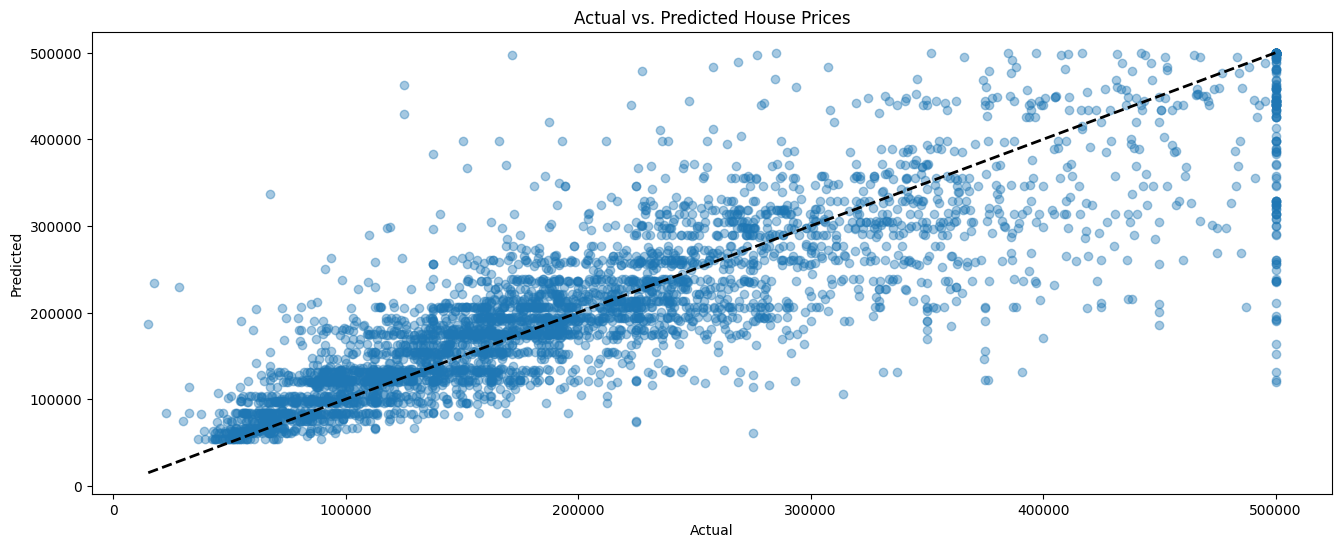

In [47]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(16, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

## 7. Persistencia

# **Exerc√≠cios**

**1. Exerc√≠cio: Avalia√ß√£o de um Regressor SVM**

  Experimente utilizar um regressor de M√°quina de Vetores de Suporte (Support Vector Machine Regressor) da biblioteca sklearn.svm (SVR) com diferentes hiperpar√¢metros. Considere testar o par√¢metro kernel com os valores "linear" (testando diversos valores para o hiperpar√¢metro $ùê∂$) e "rbf" (tamb√©m testando diferentes valores para os hiperpar√¢metros $ùê∂$ e $ùõæ$).

  **Observa√ß√£o:** Os SVMs n√£o escalam bem para conjuntos de dados grandes, portanto, √© recomend√°vel treinar seu modelo apenas com as primeiras 5.000 inst√¢ncias do conjunto de treinamento e utilizar apenas valida√ß√£o cruzada em 3 dobras (3-fold cross-validation), para evitar longos tempos de execu√ß√£o. Neste momento, n√£o se preocupe com o significado dos hiperpar√¢metros (consulte o notebook sobre SVM se tiver interesse). Ap√≥s a otimiza√ß√£o, avalie o desempenho do melhor preditor SVR.

  **Dicas:**
  - Configura√ß√£o do Pipeline: Considere utilizar um pipeline para pr√©-processamento e modelagem, facilitando a implementa√ß√£o.
  - An√°lise de Resultados: Analise as m√©tricas de desempenho, como RMSE e R¬≤, para entender a efic√°cia do modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Definindo o grid de par√¢metros para Logistic Regression
param_grid = [
    {'logreg__C': [0.01, 0.1, 1, 10, 100], 'logreg__penalty': ['l2', 'none']},
]

# Criar o pipeline com a etapa de pr√©-processamento e a Regress√£o Log√≠stica
logreg_pipeline = Pipeline([("preprocessing", preprocessador), ("logreg", LogisticRegression(max_iter=1000))])

# Aplicando GridSearchCV para encontrar os melhores par√¢metros
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=kf, scoring='r2', verbose=2)

# Treinando o modelo com as 5.000 primeiras inst√¢ncias do conjunto de treino
grid_search.fit(X_train[:5000], y_train[:5000])

# Melhor modelo encontrado pelo GridSearch
best_model = grid_search.best_estimator_

# Fazendo previs√µes no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliando o modelo com RMSE e R¬≤
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f"Melhor modelo: {best_model}")
print(f"RMSE: {rmse:.3f}")
print(f"R¬≤: {r2:.3f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................logreg__C=0.01, logreg__penalty=l2; total time= 7.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", li

[CV] END .................logreg__C=0.01, logreg__penalty=l2; total time= 6.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .................logreg__C=0.01, logreg__penalty=l2; total time= 7.2min


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [1, 3, 10, 30, 100,
                                               300, 1000, 3000]},
        {'svr__kernel': ['rbf'], 'svr__C': [1, 3, 10, 30, 100, 300,
                                            1000],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessador), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='r2')
grid_search.fit(X_train.iloc[:5000], y_train.iloc[:5000])

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

**2. Exerc√≠cio: Substituindo o GridSearchCV por RandomizedSearchCV**

  Experimente substituir o GridSearchCV por um RandomizedSearchCV para otimiza√ß√£o dos hiperpar√¢metros do seu modelo.

  **Dicas:**

  - Configura√ß√£o: Defina a busca sobre os hiperpar√¢metros do modelo, como o valor de $C$, $Œ≥$ e o tipo de kernel utilizado.
  - Controle de Tempo de Execu√ß√£o: Para evitar que a execu√ß√£o demore, limite o n√∫mero de itera√ß√µes definindo o par√¢metro `n_iter`.
  - Visualiza√ß√£o do Processo: Utilize o par√¢metro `verbose=2` para obter uma vis√£o detalhada do progresso de cada etapa da busca.

**3. Adicionando um Transformador SelectFromModel no Pipeline de Prepara√ß√£o**

  Tente adicionar um transformador `SelectFromModel` ao *pipeline* de prepara√ß√£o para selecionar apenas os atributos mais importantes.

  **Objetivo:** Criar um novo pipeline que execute o pipeline de prepara√ß√£o definido anteriormente e adicione o transformador SelectFromModel baseado em um RandomForestRegressor, antes do regressor final.

  **Dicas:**
  - Sele√ß√£o de Atributos: O SelectFromModel utiliza a import√¢ncia dos atributos calculada por um estimador (neste caso, um RandomForestRegressor).
  - Integra√ß√£o no Pipeline: O transformador de sele√ß√£o de atributos pode ser adicionado logo ap√≥s a etapa de prepara√ß√£o e antes do regressor final, para otimizar o desempenho do modelo.
  - Ajustes: Teste diferentes par√¢metros e visualize como o desempenho do modelo muda com a sele√ß√£o de vari√°veis, utilizando m√©tricas como o RMSE e R¬≤.